<a href="https://colab.research.google.com/github/duongnghia222/stuff/blob/main/22_golden_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 General infomation
* Members:
  1. Dương Đức Nghĩa - 2011671
* Datasets:
  * [***Golden Foot Football players Image Dataset*** (Classification of 23 golden football players)](https://www.kaggle.com/datasets/balabaskar/golden-foot-football-players-image-dataset)
    * Tập dataset gồm 7188 tấm ảnh chia làm 22 class đó chính là 22 cầu thủ tấn công xuất sắc nhất thế giới
    * Các bức ảnh có kích thước khác nhau
    <a href="https://ibb.co/WPtFx3v"><img src="https://i.ibb.co/b2JLW35/image.png" alt="image" border="0"></a>
    <a href="https://ibb.co/TkFJzjZ"><img src="https://i.ibb.co/zr0CK91/image.png" alt="image" border="0"></a>
    * Tuy nhiên có một số bức ảnh được gắn nhãn không chính xác
    <a href="https://ibb.co/hRnMkzM"><img src="https://i.ibb.co/3y8swZs/image.png" alt="image" border="0"></a>
    * Một số ảnh bị nhiễu 
    
    <a href="https://ibb.co/zXzC3sZ"><img src="https://i.ibb.co/3pnVx1c/image.png" alt="image" border="0"></a>
* Backbone:
  * [***EfficientNet(The art of scaling)*** (https://arxiv.org/abs/1905.11946)](https://arxiv.org/abs/1905.11946)
  
    <a href="https://ibb.co/R4012fs"><img src="https://i.ibb.co/NnjXx5J/image.png" alt="image" border="0"></a>
    




#2 About EfficientNet
* Introduction:\
  Scaling up ConvNets is widely used to achieve better accuracy.  ResNet can be scaled up from ResNet-18 to ResNet-200 by using more layers. GPipe achieved 84.3% ImageNet top-1 accuracy by scaling up a baseline model four time larger. The most common way is to scale up ConvNets by their depth or width. Another less common, but increasingly
  popular, method is to scale up models by image resolution. So is there a principled method to scale up
  ConvNets that can achieve better accuracy and efficiency?\
  --> Solution is that we can an effective compound scaling method.
  Unlike conventional practice that arbitrary scales these factors, this method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients  For
example, if we want to use $2^N$
 times more computational
resources, then we can simply increase the network depth by
$α^N$, width by $β^N$, and image size by $γ^N$, where α, β, γ are
constant coefficients determined by a **small grid search** on
the original small model.

  Intuitively, the compound scaling method makes sense because if the input image is bigger, then the network needs
  more layers to increase the receptive field and more channels
  to capture more fine-grained patterns on the bigger image.

  In fact, there exists certain relationship between network
width and depth, but to our best knowledge, we are the
first to empirically quantify the relationship among all three
dimensions of network width, depth, and resolution.

 Effectiveness of model scaling heavily depends on the baseline network; to
go even further, we use neural architecture search to develop a new baseline network, and scale it up to obtain a family of models, called
EfficientNets.
<a href="https://ibb.co/1Mrv1Nx"><img src="https://i.ibb.co/RN3vfKW/image.png" alt="image" border="0"></a>\
Figure above summarizes the ImageNet performance, where EfficientNets significantly outperform
other ConvNets. In particular, our EfficientNet-B7 surpasses
the best existing GPipe accuracy (2018), but
using 8.4x fewer parameters and running 6.1x faster on inference. Compared to the widely used ResNet-50, our EfficientNet-B4 improves the top-1 accuracy from 76.3% to 83.0% (+6.7%) with similar FLOPS. Besides
ImageNet, EfficientNets also transfer well and achieve state-of-the-art accuracy on 5 out of 8 widely used datasets, while
reducing parameters by up to 21x than existing ConvNets.

#3 Compound Model Scaling
  * 3.1 Problem Formulation\
  A ConvNet Layer i can be defined as a function: $Y_{i} = F_i(X_i)$,
, where $F_i$
is the operator, $Y_{i}$
is output tensor, $X_{i}$ 
is
input tensor, with tensor shape <$H_i
, W_i
, C_i$> where $H_i$ and
$W_i$ are spatial dimension and $C_i$
is the channel dimension\
We can define a ConvNet as:
$N = ⊙ F_i^{L_i}(X_{<H_i
, W_i
, C_i>})$ (i = 1,2,..s)
where $F_i^{L_i}$ 
denotes layer $F_i$ 
is repeated $L_i$
times in stage i, <$H_i
, W_i
, C_i$> denotes the shape of input tensor X of layer i.\
  Unlike regular ConvNet designs that mostly focus on finding the best layer architecture $F_i$
, model scaling tries to expand the network length ($L_i$), width ($C_i$), and/or resolution
($H_i$
, $W_i$) without changing Fi predefined in the baseline
network.  The target is to maximize the model accuracy
for any given resource constraints, which can be formulated
as an optimization problem:
<img src="https://i.ibb.co/dDgtRLn/image.png" alt="image" width = 400 border="0" >

  Where w, d, r are coefficients for scaling network width,
depth, and resolution; $F^
i$
,$L^
i$
, $H^
i$
, $W^
i$
, $C^
i$ are predefined parameters in baseline network.

* 3.2. Scaling Dimension\
  The main difficulty of problem 2 is that the optimal d, w, r
depend on each other and the values change under different
resource constraints. Due to this difficulty, conventional
methods mostly scale ConvNets in one of these dimension:\
  **Depth(d):** Scaling network depth is the most common way
used by many ConvNet. However, deeper networks
are also more difficult to train due to the vanishing gradient
problem (Zagoruyko & Komodakis, 2016)\
<a href="https://ibb.co/qskxqym"><img src="https://i.ibb.co/XsSV02F/image.png" alt="image" border="0" width="300" ></a>\
Picture above shows a test on scaling a baseline
model with different depth coefficient d, further suggesting
the diminishing accuracy return for very deep ConvNets\
  **Width(w):** Scaling network width is commonly used for
small size, wider networks tend to be able to capture
more fine-grained features and are easier to train. However,
extremely wide but shallow networks tend to have difficulties in capturing higher level features. \
<a href="https://ibb.co/qNH391Z"><img src="https://i.ibb.co/VgFcDBK/image.png" alt="image" border="0" width="300" ></a>\
 Picture above shows that the accuracy quickly saturates
when networks become much wider with larger w.\
  **Resolution(r):** With higher resolution input images, ConvNets can potentially capture more fine-grained patterns.
Starting from 224x224 in early ConvNets, modern ConvNets tend to use 299x299 or 331x331 for better accuracy. Higher resolutions, such as
600x600, are also widely used in object detection ConvNets. \
<a href="https://ibb.co/6ZcFtxY"><img src="https://i.ibb.co/qnLpgfB/image.png" alt="image" border="0" width="300" ></a>\
 Picture shows the
results of scaling network resolutions, where indeed higher
resolutions improve accuracy, but the accuracy gain diminishes for very high resolutions (r = 1.0 denotes resolution
224x224 and r = 2.5 denotes resolution 560x560)

  # **Observation 1** 
  Scaling up any dimension of network
  width, depth, or resolution improves accuracy, but the accuracy gain diminishes for bigger models.

* 3.2. Compound Scaling\
  Intuitively, for higher resolution images,
we should increase network depth, such that the larger receptive fields can help capture similar features that include
more pixels in bigger images. Correspondingly, we should
also increase network width when resolution is higher, in order to capture more fine-grained patterns with more pixels
in high resolution images. These intuitions suggest that we
need to coordinate and balance different scaling dimensions
rather than conventional single-dimension scaling.\
# **Observation 2** 
  In order to pursue better accuracy and
efficiency, it is critical to balance all dimensions of network
width, depth, and resolution during ConvNet scaling.


  * 3.3 Method\
  Using a compound coefficient $Φ$ to uniformly scales
network width, depth, and resolution in a principled way:\
  depth: d = $α^Φ$\
  width: w = $β^Φ$\
  resolution: $r = γ^Φ$\
  st: $α.β^2.γ^2≈2$\
      $α≥1, β≥1, γ≥1$\
      where α, β, γ are constants that can be determined by a
small grid search.



#4  EfficientNet Architectur
<a href="https://ibb.co/THcdDM9"><img src="https://i.ibb.co/19ZjYGF/image.png" alt="image" border="0" width="400"></a>

Starting from the baseline EfficientNet-B0, we apply our
compound scaling method to scale it up with two steps:
* Step 1: We first fix Φ = 1, assuming twice more resources available, and do a small grid search of α, β, γ
based on Equation 2 and 3. In particular, we find
the best values for EfficientNet-B0 are α = 1.2, β = 1.1, γ = 1.15, under constraint of $α.β^2.γ^2≈2$
* Step 2: We then fix α, β, γ as constants and scale up
baseline network with different Φ using Equation 3, to
obtain EfficientNet-B1 to B7 (Details in Table 2)

# Experiments
<a href="https://ibb.co/3M2BZ0S"><img src="https://i.ibb.co/5nmBH5s/image.png" alt="image" border="0"></a>\
EfficientNet models consistently reduce parameters and FLOPS by an order of magnitude
(up to 8.4x parameter reduction and up to 16x FLOPS reduction) than existing ConvNets

#4 Data Preparation and more (from here)
 

# Prepare

* Kiểm tra bộ nhớ ram

In [ ]:
!grep MemTotal /proc/meminfo

MemTotal:       13297200 kB


Link with google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import lib

In [1]:
# Basic
import os
import glob
import numpy as np
import random

# My helper lib
import pathlib 
import matplotlib.image as mpimg # to show img


# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Tensorflow for machine learning
%tensorflow_version 2.9.1
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.utils as utils
from tensorflow.keras import Sequential
import tensorflow.keras.applications as app
import tensorflow.keras.layers as layers
import tensorflow.keras as keras
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout
from keras.layers import Input, RandomRotation, RandomFlip, RandomZoom, RandomHeight, RandomWidth, GlobalAveragePooling2D
from keras.models import load_model

# Callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# Classification models
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3 
# from tensorflow.keras.applications import VGG16, ResNet50, ResNet50V2, InceptionV3, Xception, \
#         ResNet152, ResNet152V2, MobileNetV3Large,MobileNetV3Small


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.1


* Visualizing data

In [3]:
path_to_data = '/content/drive/MyDrive/hcmut/IPCV/football_golden_foot/dataset_splitted'
path_to_train_data = '/content/drive/MyDrive/hcmut/IPCV/football_golden_foot/dataset_splitted/train'
path_to_val_data = '/content/drive/MyDrive/hcmut/IPCV/football_golden_foot/dataset_splitted/val'

In [4]:
data_dir = pathlib.Path(path_to_train_data)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])).tolist() # created a list of class_names from the subdirector
class_dis = [len(os.listdir(path_to_train_data + f"/{name}")) for name in class_names]
lk_dis = dict(zip(class_names, class_dis))

fig = px.pie(names=class_names, values=class_dis, width=600)
fig.update_layout({"title":{'text':"Class Distribution","x":0.5}})
fig.show()

* Randomly show a picture from training set

Image shape: (560, 1002, 3)


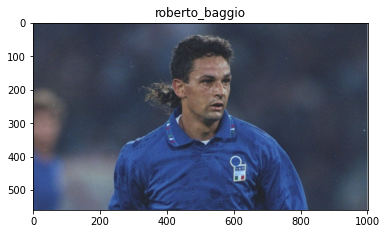

In [6]:
# Get a random class (1/22 classes)
target_class = random.choice(class_names)
target_folder: str = path_to_train_data + '/' + target_class

# Get a random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
img = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(img)
plt.title(target_class)

print(f"Image shape: {img.shape}")

* Setup hyperparameters for trainning process

In [7]:
BATCH_SIZE: int = 32
EPOCHS: int = 30
AUGMENTATION_FACTOR: float = 0.2
LABEL_MODE: str = "categorical"
IMAGE_SIZE = (224, 224)

TRAIN_DIR: str = path_to_train_data
TEST_DIR: str = path_to_val_data

* Setup training data and test data

In [8]:
print("training set")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TRAIN_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    shuffle=True
)

print("testing data")
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TEST_DIR,
    batch_size=BATCH_SIZE,
    label_mode=LABEL_MODE,
    image_size=IMAGE_SIZE,
    shuffle=False
)

training set
Found 5739 files belonging to 22 classes.
testing data
Found 1449 files belonging to 22 classes.


* How many classes do we have ?

In [9]:
class_names = train_data.class_names
len(class_names)

22

* Setup augmentation layer to generalize data better during training

In [10]:
augmentation_layer = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(AUGMENTATION_FACTOR),
    RandomZoom(AUGMENTATION_FACTOR),
    RandomHeight(AUGMENTATION_FACTOR),
    RandomWidth(AUGMENTATION_FACTOR)
], name="augmentation_layer")

* Show image after augmentation layer

/content/drive/MyDrive/hcmut/IPCV/football_golden_foot/dataset_splitted/train/zlatan_ibrahimovic/a0e38f580b.jpg


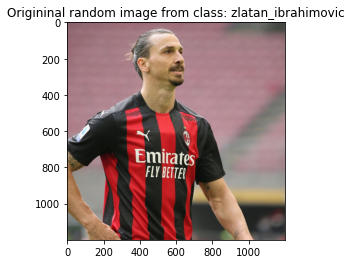

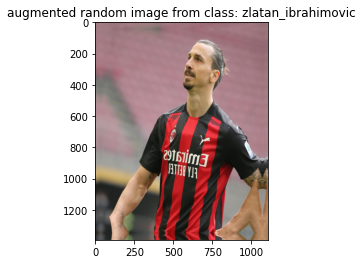

In [11]:
target_class = random.choice(class_names)
target_dir = f"{path_to_train_data}/{target_class}"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

print(random_image_path)
# Read in the random image
img = mpimg.imread(random_image_path)
plt.title(f"Origininal random image from class: {target_class}")
# plt.axis(False)
plt.imshow(img);

# Now lets plot our augmented random image
augmented_image = augmentation_layer(img, training=True)
plt.figure()
plt.title(f"augmented random image from class: {target_class}")
plt.imshow(augmented_image / 255.)

* Design model to train data

In [12]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')


base_model = EfficientNetB0(include_top=False) # transfer learning
base_model.trainable = True 
print("Number of layer in EfficientNetB0", len(base_model.layers))
for layer in base_model.layers[:-60]: # we train only on 60 last layers in EffNetB0
  layer.trainable = False

input_layer = Input(shape=IMAGE_SIZE + (3, ), name="input_layer")
x = augmentation_layer(input_layer)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name="global_average_pooling_2d")(x)
x = Dense(320, activation=tf.keras.activations.relu)(x)
x = Dropout(0.4)(x)
output_layer = Dense(len(class_names), activation=tf.keras.activations.sigmoid,
                     name="output_layer")(x)

model_1 = tf.keras.Model(input_layer, output_layer)

Number of layer in EfficientNetB0 238


* View model summary

In [13]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2d (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 320)               409920    
                                                                 
 dropout (Dropout)           (None, 320)               0     

In [14]:
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

* Setup callback for early-stopping, reduce learning rate, and model checkpoint during training

In [15]:
early_stopping_callback = EarlyStopping(monitor="val_loss",
                                                           verbose = True,
                                                  patience=3) # stop training if val_loss 
                                                          # does not change after 3 consecutive eporch
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

checkpoint_path = '/content/drive/MyDrive/hcmut/IPCV/football_golden_foot'
checkpoint_callback = ModelCheckpoint(
    filepath= checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

* Train the model

In [19]:
history_1 = model_1.fit(
    train_data,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback, 
        #checkpoint_callback
    ]
)

Epoch 1/30
180/180 [==============================] - 49s 269ms/step - loss: 0.6391 - accuracy: 0.8045 - val_loss: 0.8460 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/30
180/180 [==============================] - 49s 265ms/step - loss: 0.6545 - accuracy: 0.8470 - val_loss: 0.9755 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 3/30
180/180 [==============================] - ETA: 0s - loss: 0.4740 - accuracy: 0.8521
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
180/180 [==============================] - 44s 240ms/step - loss: 0.4740 - accuracy: 0.8521 - val_loss: 0.8892 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/30
180/180 [==============================] - 43s 232ms/step - loss: 0.2191 - accuracy: 0.9343 - val_loss: 0.5305 - val_accuracy: 0.8438 - lr: 2.0000e-04
Epoch 5/30
180/180 [==============================] - 43s 232ms/step - loss: 0.1272 - accuracy: 0.9606 - val_loss: 0.5526 - val_accuracy: 0.8594 - lr: 2.0000e-04
Epoch 6/30
180/180 [====================

* See how the model work !

In [21]:
loss, accuracy = model_1.evaluate(test_data)
print("Accuracy", accuracy)

46/46 [==============================] - 7s 145ms/step - loss: 0.4977 - accuracy: 0.8758
Accuracy 0.8757764101028442


* Save the model

In [23]:
model_1.save('/content/drive/MyDrive/hcmut/IPCV/football_golden_foot/EffNetB0_{}.h5'.format(accuracy))

* Plot the graph 

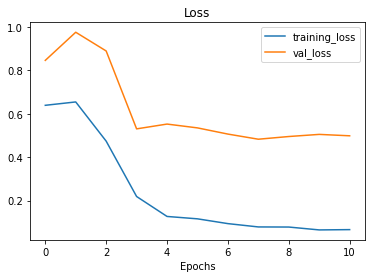

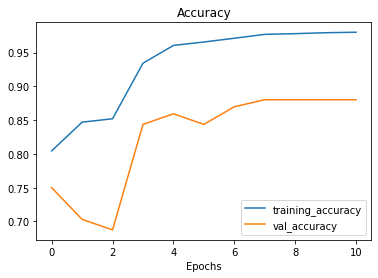

In [24]:
import matplotlib.pyplot as plt
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

accuracy = history_1.history["accuracy"]
val_accuracy = history_1.history["val_accuracy"]

epochs = range(len(history_1.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

Seem like we are having overfitting problem

In [ ]:
preds_probs = model_1.predict(test_data)
preds_probs[:1]

46/46 [==============================] - 8s 137ms/step


array([[9.9922884e-01, 9.2430033e-05, 6.0534528e-03, 2.2866379e-01,
        8.1436753e-01, 1.9756613e-02, 9.8906189e-01, 9.9975795e-01,
        8.0045086e-01, 2.9777407e-03, 1.4879056e-03, 7.3055309e-01,
        8.5885957e-02, 5.1799964e-02, 4.6593515e-04, 1.0274941e-03,
        7.8127331e-01, 1.0976488e-03, 3.2617876e-03, 3.8859343e-06,
        1.0096682e-03, 9.1340566e-01]], dtype=float32)

In [ ]:
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

array([ 7, 13,  0,  0,  9,  0,  0,  0,  9,  0])

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

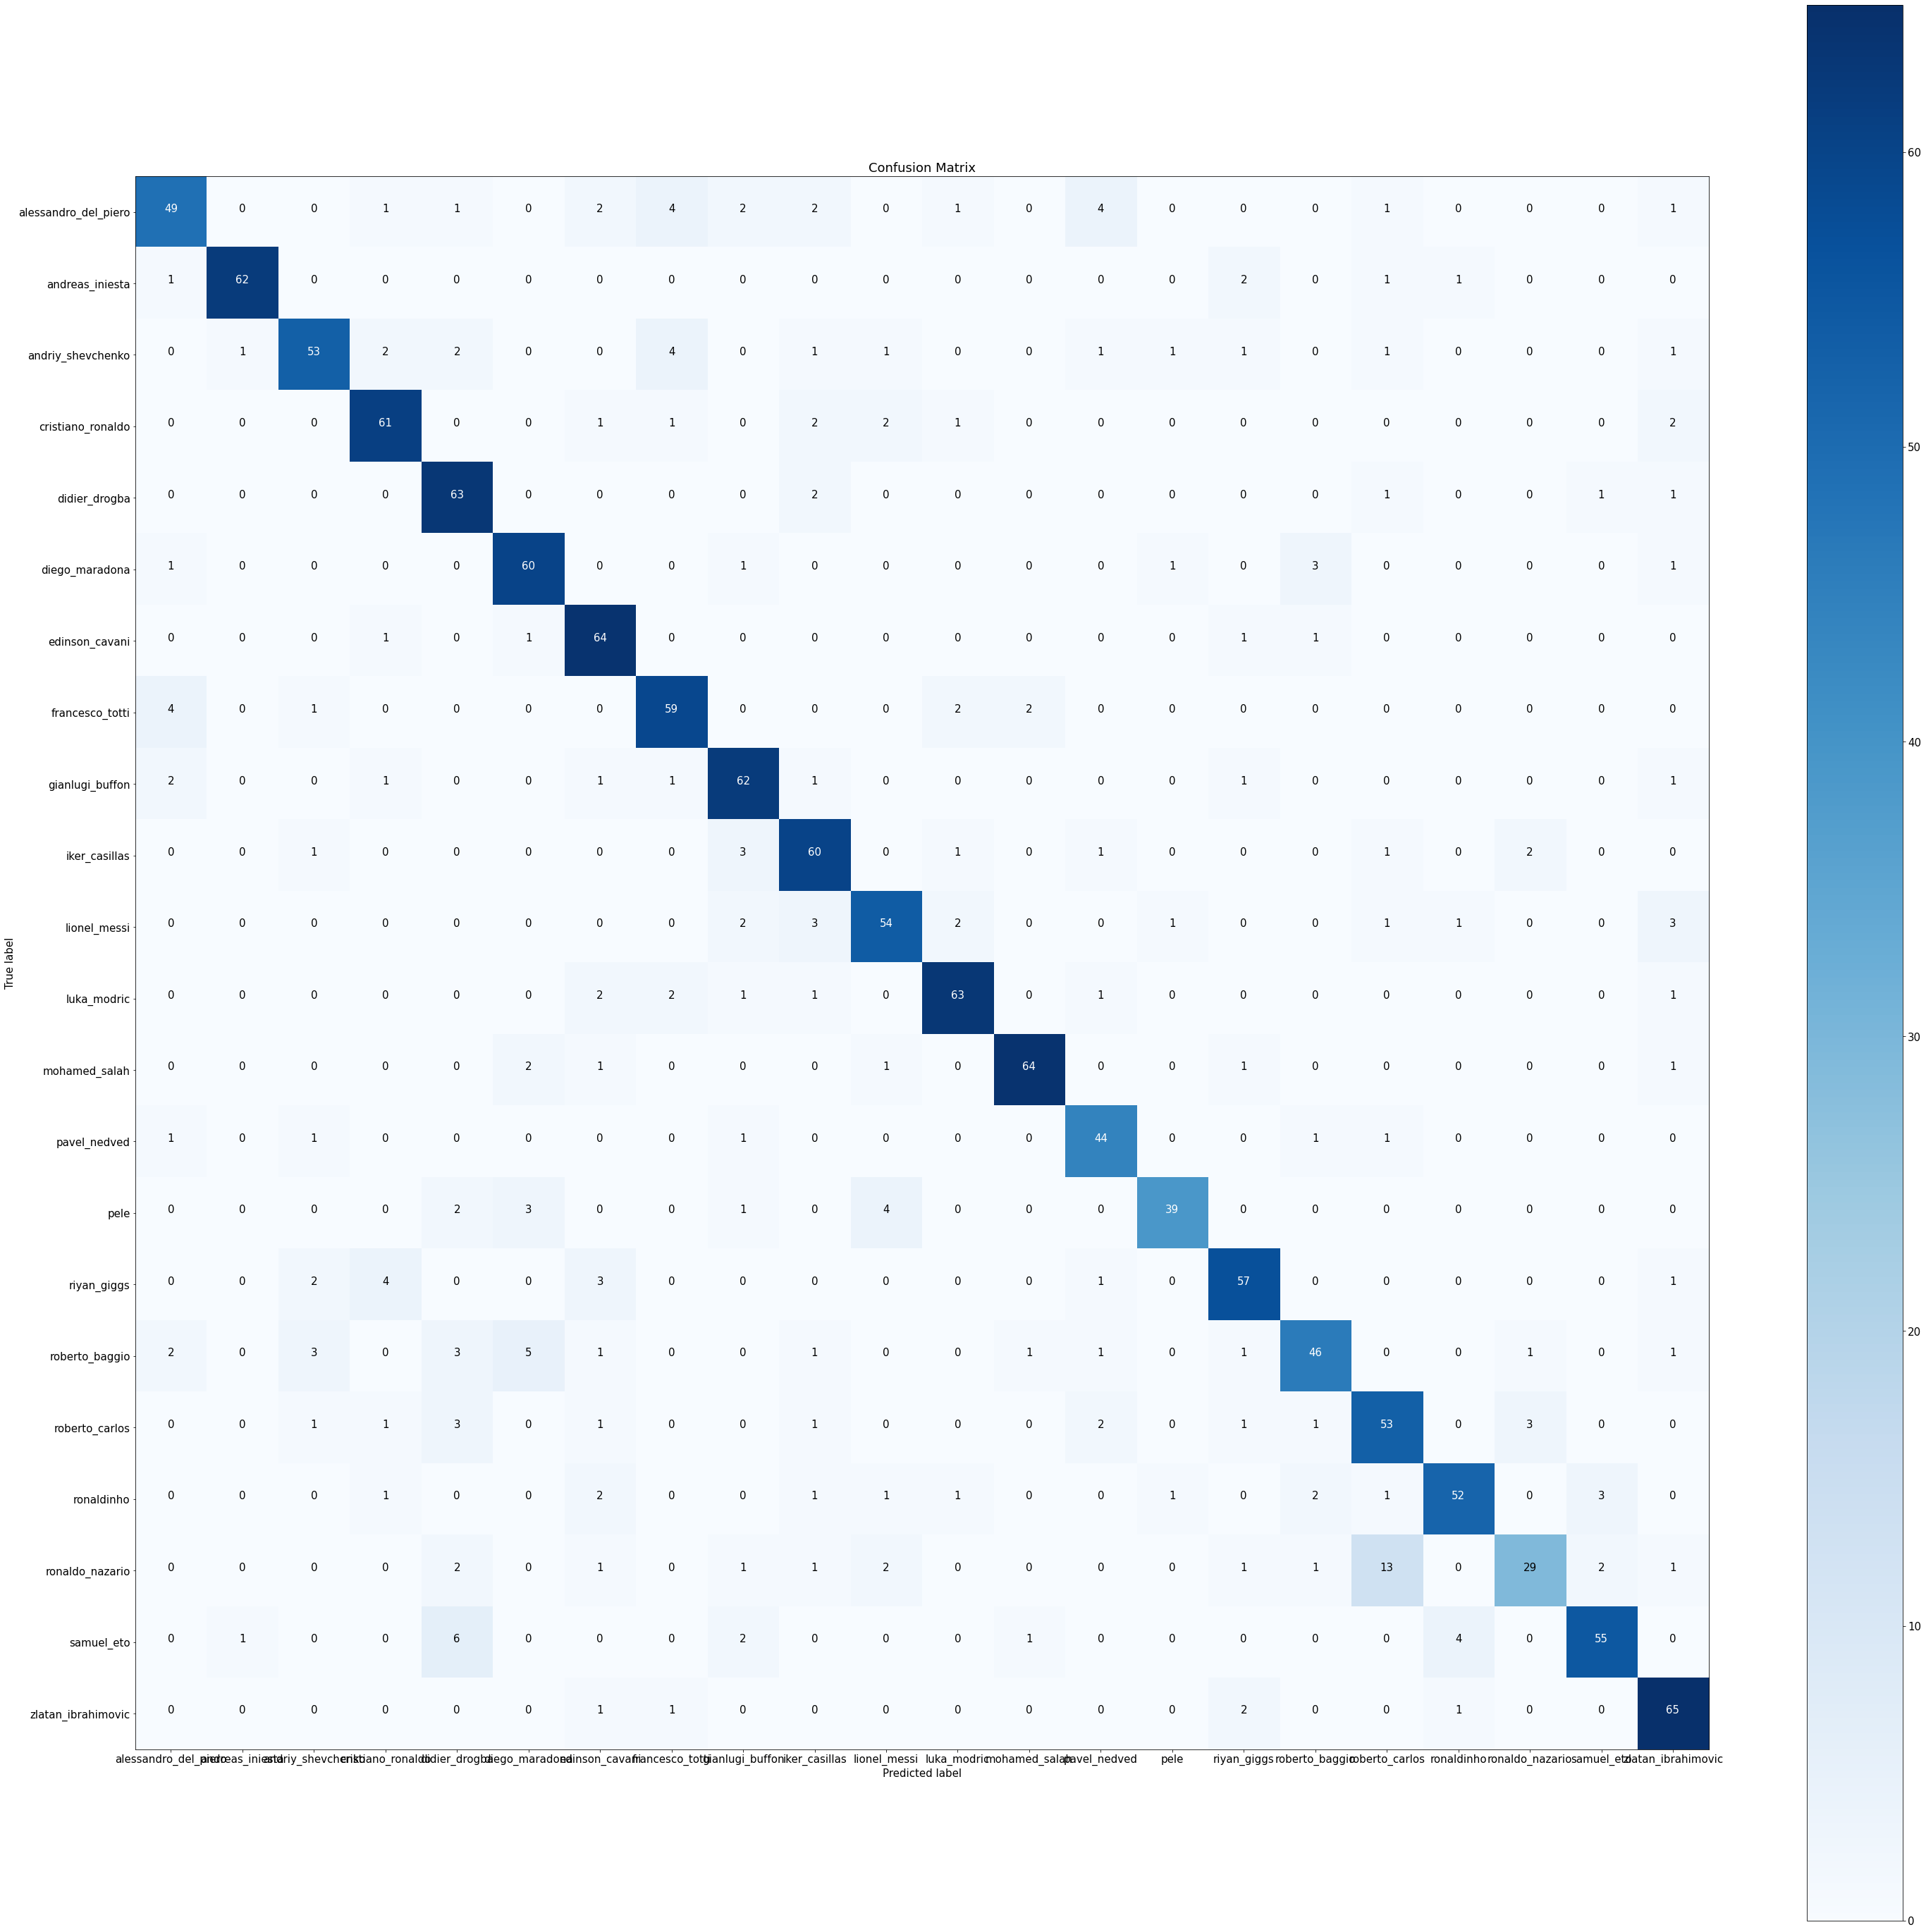

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).
      norm: normalize values or not (default=False).
      savefig: save confusion matrix to file (default=False).

    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """
    # Create the confustion matrix
    plt.rcParams.update({"font.size": text_size})
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / \
        cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with
    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    # colors will represent how 'correct' a class is, darker == better
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           # create enough axis slots for each class
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           # axes will labeled with class names (if they exist) or ints
           xticklabels=labels,
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)

    # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(50, 50))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        68
           1       0.97      0.93      0.95        67
           2       0.85      0.77      0.81        69
           3       0.85      0.87      0.86        70
           4       0.77      0.93      0.84        68
           5       0.85      0.90      0.87        67
           6       0.80      0.94      0.86        68
           7       0.82      0.87      0.84        68
           8       0.82      0.89      0.85        70
           9       0.79      0.87      0.83        69
          10       0.83      0.81      0.82        67
          11       0.89      0.89      0.89        71
          12       0.94      0.91      0.93        70
          13       0.80      0.90      0.85        49
          14       0.91      0.80      0.85        49
          15       0.84      0.84      0.84        68
          16       0.84      0.70      0.76        66
          17       0.72    